**Dataset Overview**

RowNumber - Sequential index of the customer in the dataset.

CustomerId - Unique identifier assigned to each customer.

Surname - Last name of the customer.

CreditScore - Credit rating of the customer (higher is better).

Geography - Country of residence of the customer.

Gender - Gender of the customer (Male/Female).

Age - Age of the customer in years.

Tenure - Number of years the customer has been with the bank.

Balance - Account balance of the customer.

NumOfProducts - Number of financial products the customer has.

HasCrCard - Indicates whether the customer has a credit card (1 = Yes, 0 = No).

IsActiveMember - Indicates if the customer is an active member (1 = Yes, 0 = No).

EstimatedSalary - Estimated yearly salary of the customer.

Exited - Indicates whether the customer has churned (1 = Yes, 0 = No).

Complain - Whether the customer has filed a complaint (1 = Yes, 0 = No).

Satisfaction Score - Customer satisfaction rating on a scale.

Card Type - Type of credit card the customer holds (e.g., Gold, Diamond).

Point Earned - Reward points accumulated by the customer.






In [ ]:
#loading the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras,classification_report,ConfusionMatrixDisplay,confusion_matrix

import joblib



import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load the dataset
df=pd.read_csv('/content/Banking-Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [ ]:
#check for shape and size
print(df.shape)
print(df.size)

(10000, 18)
180000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
#check for descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


From above analysis, we can see that there's variation in data.

This dataset must be scaled for furthere analysis.

**Exploratory Data Analysis**

In [ ]:
#check for null values
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


We have a cleaned dataset with no null values.

In [ ]:
#we will be dropping some unnecessary columns
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

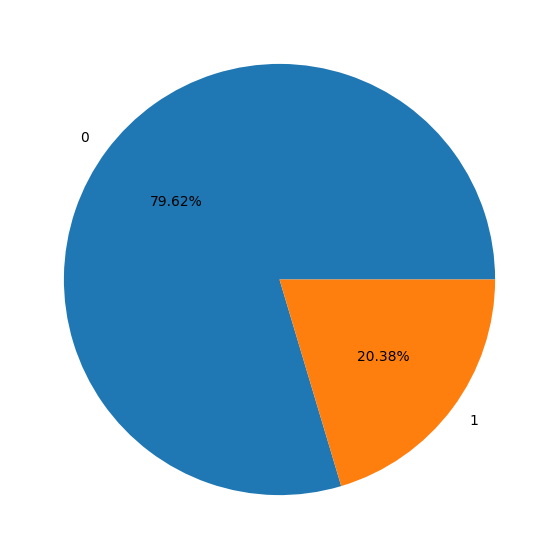

In [ ]:
# will check for imbalance dataset
plt.figure(figsize=(12,7))
plot=df['Exited'].value_counts()
plt.pie(plot.values , labels=plot.index,autopct="%1.2f%%")
plt.show()

We can see that there's Class imbalance this will be fix using RandomOverSampling.

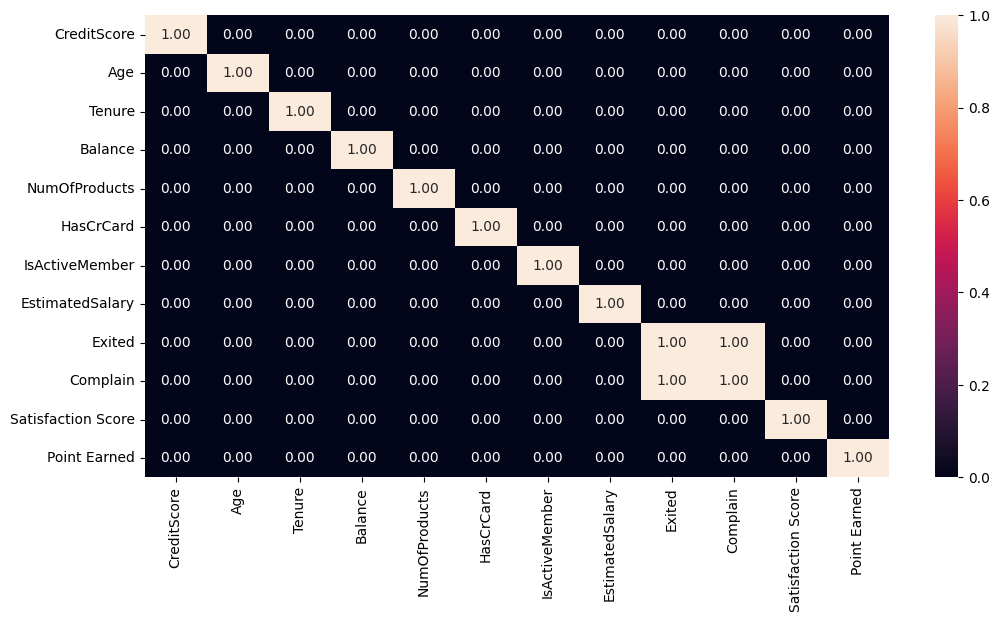

In [ ]:
#check for correlation
plt.figure(figsize=(12,6))

sns.heatmap(df.corr(numeric_only=True)>0.9,annot=True,fmt=".2f")
plt.show()

We found taht complaint is highly related customers existence in the service , will show its visualisation in the next step.

In [ ]:
#filtering categorical and numerical column for further Analysis
obj=df.select_dtypes(include='object').columns.to_list()
print('Categorical columns',obj)

num=df.select_dtypes(include=['int64','float64']).columns.to_list()
print('Numerical columns',num)





# num_col=[]  #for storing numerical values
# obj_col=[]  #for storing categorical values
# for col in df.columns:
#   if df[col].dtype=='int64':
#     num_col.append(col)

#   if df[col].dtype=='float64':
#     num_col.append(col)

#   if df[col].dtype=='object':
#     obj_col.append(col)

# print(num_col)
# print(obj_col)



Categorical columns ['Geography', 'Gender', 'Card Type']
Numerical columns ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score', 'Point Earned']


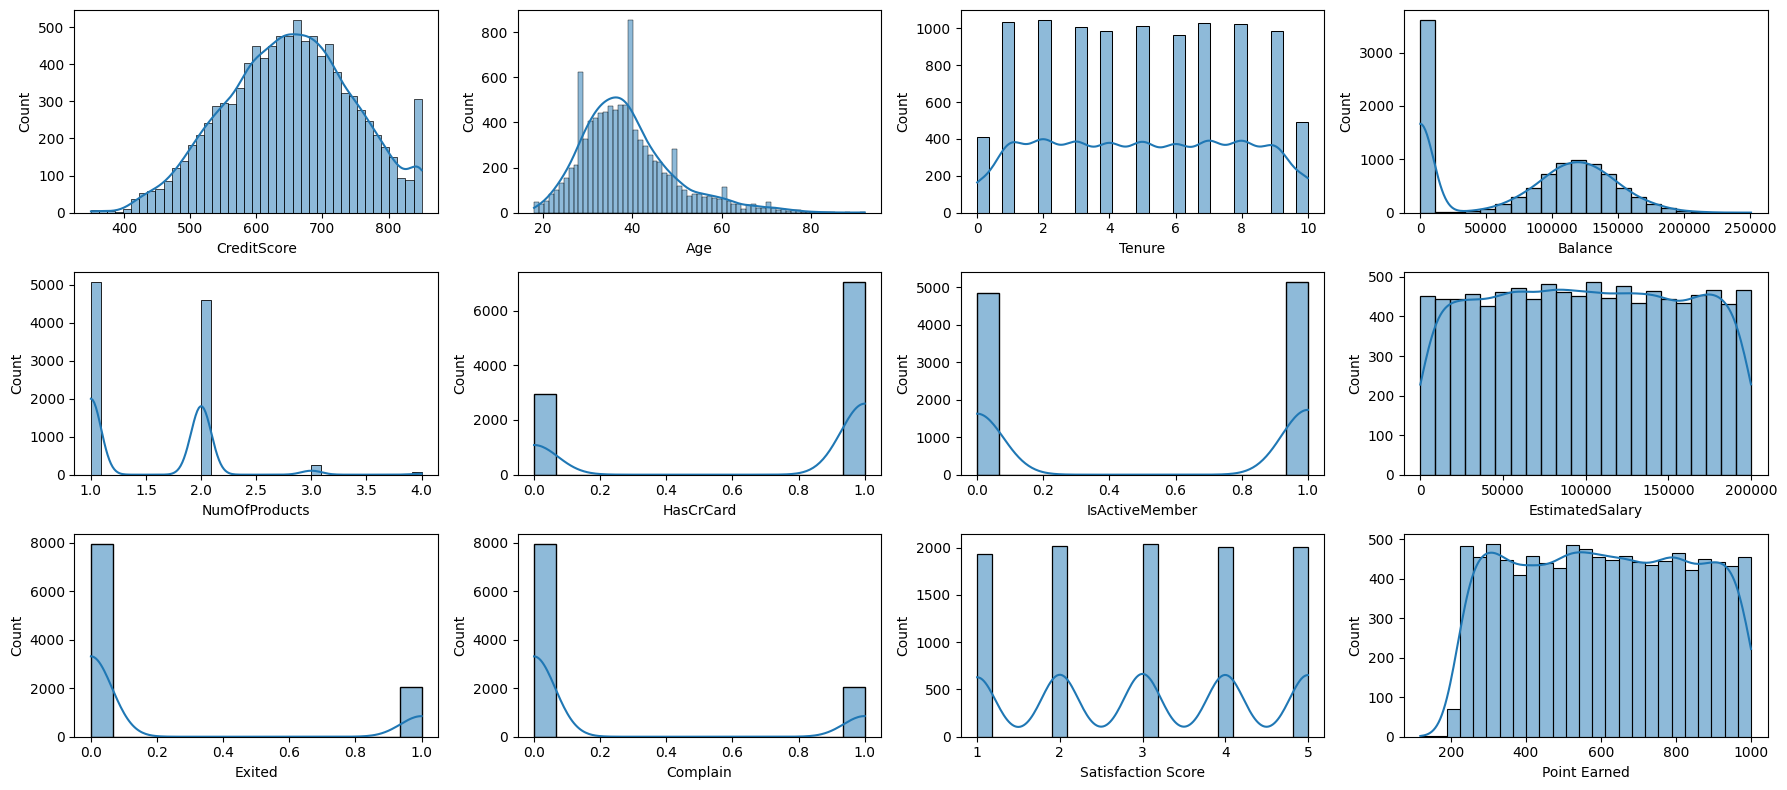

In [ ]:
# checking distribution using histplot

plt.figure(figsize=(18,8)) #setting figure size

for i,col in enumerate(num):  #intering through numerical columns
  plt.subplot(3,4,i+1)
  sns.histplot(df[col],kde=True)
  # plt.title(f'{col}')

plt.tight_layout()
plt.show()



*   Credit Score, Age, and Balance show meaningful variations, while Estimated Salary is uniformly distributed.
*   Tenure and Satisfaction Score appear evenly spread, indicating no strong bias.

*   Most customers use 1-2 products, and a significant portion have zero balance.
*   Churn (Exited) is imbalanced, which may require resampling techniques (e.g., SMOTE) if used in modeling.




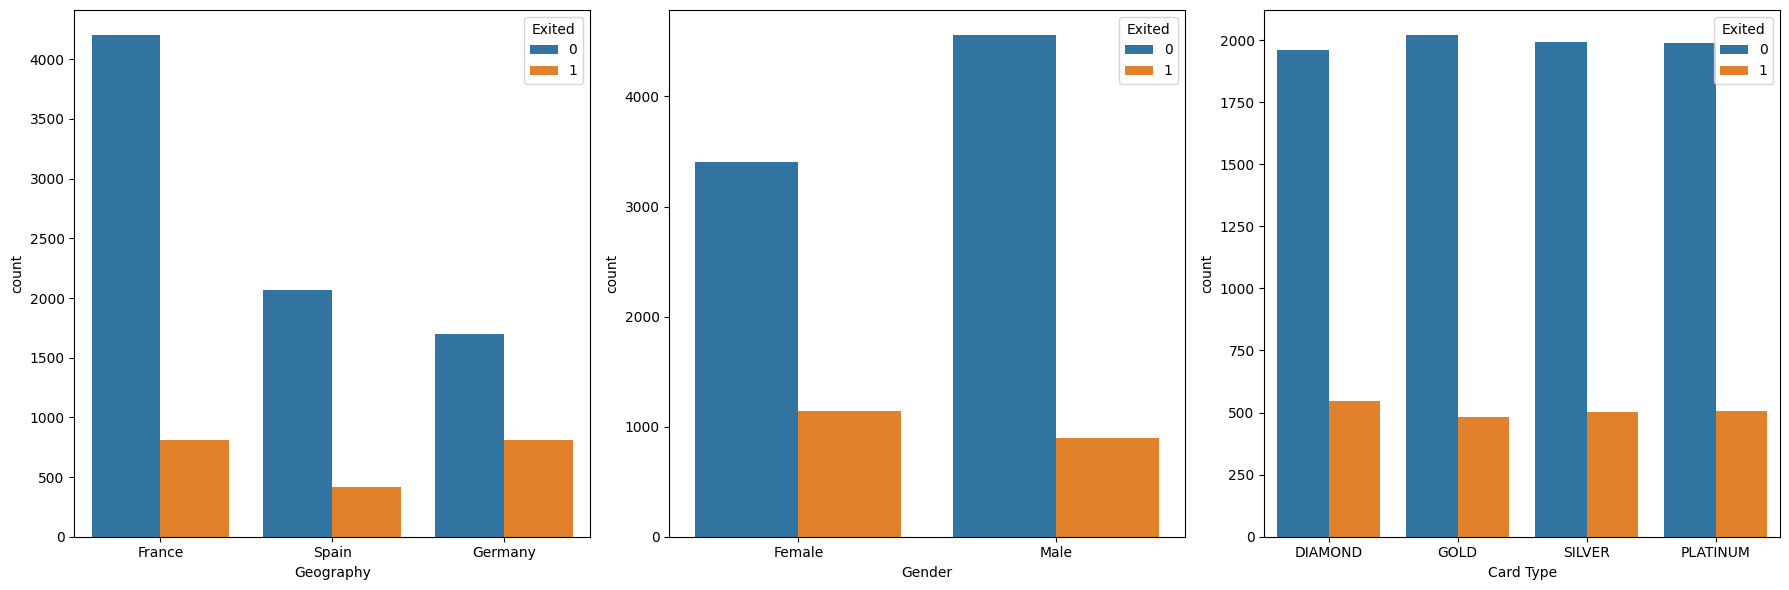

In [ ]:
# visualisation of categorical values

plt.figure(figsize=(18,6)) #setting figure size

for i,col in enumerate(obj):
  plt.subplot(1,3,i+1)
  sns.countplot(x=df[col],hue=df['Exited'])

plt.tight_layout()
plt.show()

From the above visual we can infere that [ orange bar-churners , blue bar - non churners ]

*   France and Germany has high churning rate

*   Women has high churning rate compared to men

*   Among all the Card Holder , Diamond card Holder have high churning rate compared to Gold,Silver and platnium






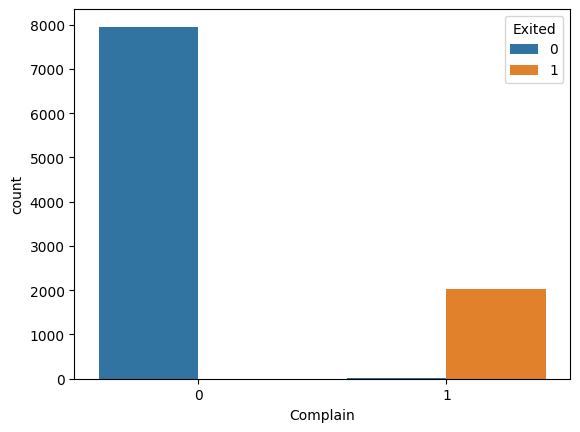

In [ ]:
#lets check how related cusomter complaint to exited
sns.countplot(x=df['Complain'],hue=df['Exited'])
plt.show()

we can see that the customer who didnt complain rarely churn and the customer who raised complaint alomst always churn .

In [ ]:
df.groupby('Complain')['Exited'].mean()

,Exited
Complain,
0,0.000503
1,0.995108


We can see that there are 99% chances to churn if a customer raise complaint

<Axes: xlabel='Satisfaction Score', ylabel='count'>

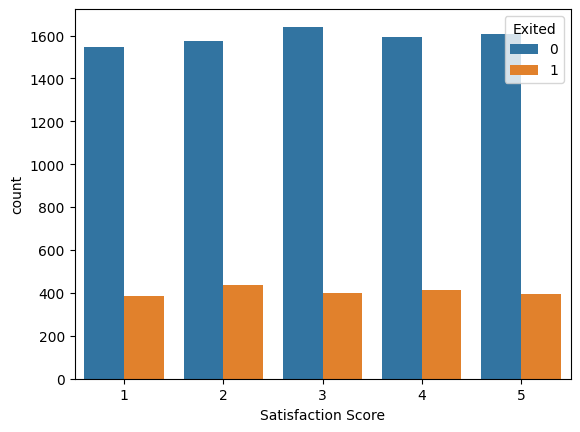

In [ ]:
sns.countplot(x=df['Satisfaction Score'],hue=df['Exited' ])

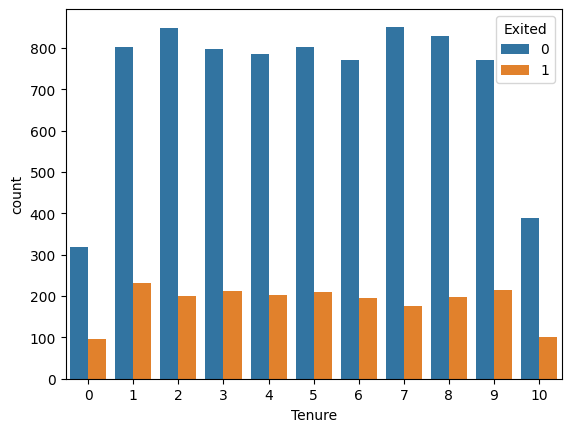

In [ ]:
sns.countplot(x=df['Tenure'],hue=df['Exited'])
plt.show()

<Figure size 1800x600 with 0 Axes>

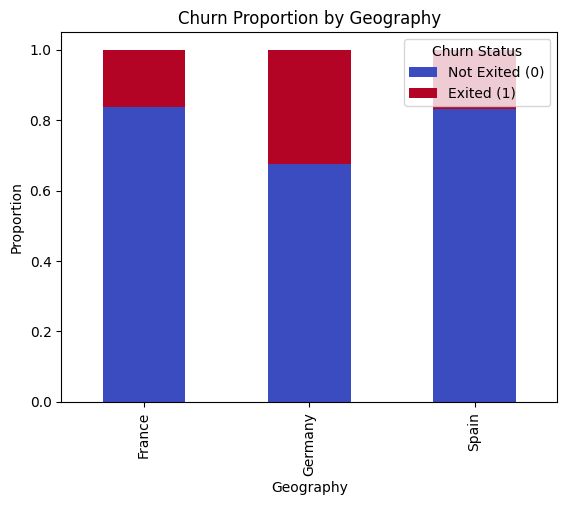

In [ ]:
#churn rate by geography
plt.figure(figsize=(18,6))
# Create a crosstab for Geography vs Exited
churn_counts = pd.crosstab(df["Geography"], df["Exited"], normalize="index")

# Plot the stacked bar chart
churn_counts.plot(kind="bar", stacked=True, colormap="coolwarm")

# Labels & Title
plt.title("Churn Proportion by Geography")
plt.xlabel("Geography")
plt.ylabel("Proportion")
plt.legend(["Not Exited (0)", "Exited (1)"], title="Churn Status")

# Show the plot
plt.show()


Germany show higher churn rate as compared to other countries.

**Data preprocessing**

In [ ]:
# encoding the categorical values

# intialise the encoder
Le=LabelEncoder()

for col in obj:
  df[col]=Le.fit_transform(df[col])
  print(Le.classes_)


['France' 'Germany' 'Spain']
['Female' 'Male']
['DIAMOND' 'GOLD' 'PLATINUM' 'SILVER']


In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')

**Feature Selection**

In [ ]:
x=df.drop('Exited',axis=1)
y=df['Exited']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8000, 14), (2000, 14), (8000,), (2000,))

In [ ]:
#scaling the numerical

# intialise the scaler
Sc=StandardScaler()

for col in num:
  x_train=Sc.fit_transform(x_train)
  x_test=Sc.transform(x_test)



In [ ]:
# saving scaler for deployment
joblib.dump(Sc,"Sc.pkl")

['Sc.pkl']

**Model Development and Evaluation**

In [ ]:
model=[LogisticRegression(),SVC(kernel='linear',probability=True),
       RandomForestClassifier(),XGBClassifier()]

for i in range(4):
  print(model[i])
  model[i].fit(x_train,y_train)

  y_pred_train=model[i].predict(x_train)
  print("Training accuracy",ras(y_pred_train,y_train))

  y_pred_test=model[i].predict(x_test)
  print("Training accuracy",ras(y_pred_test,y_test))
  print()

LogisticRegression()
Training accuracy 0.9970381214857684
Training accuracy 0.9984165966010663

SVC(kernel='linear', probability=True)
Training accuracy 0.9970381214857684
Training accuracy 0.9984165966010663

RandomForestClassifier()
Training accuracy 1.0
Training accuracy 0.9984165966010663

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
         

Among all the model , we found RandomForestClassifier the best with less difference between training and testing result.

In [ ]:
y_pred_train

array([0, 0, 1, ..., 1, 1, 0])

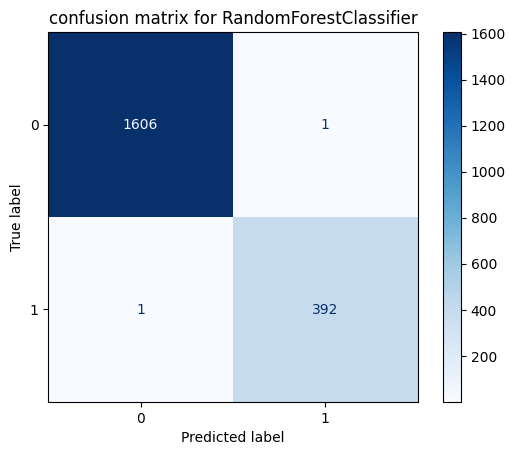

In [ ]:
#plotting confusionMatrixDisplay for RandomForestClassifier
y_pred=model[2].predict(x_test)


# Computing confusion matrix & Displaying confusion matrix
disp=ConfusionMatrixDisplay(confusion_matrix(y_pred,y_test))
disp.plot(cmap='Blues')
plt.title("confusion matrix for RandomForestClassifier")
plt.show()


**Deployment**

In [ ]:
# Saving RandomForestClassifier model for deployment
joblib.dump(model[2],"RFC_model.pkl")

['RFC_model.pkl']

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [ ]:
#  app.py code

import streamlit as st
import joblib
import numpy as np
import time
from MLEncoder import MultiLabelEncoder  # importing the custom Multi Label Encoder class

# Load Model, Encoder & Scaler
model = joblib.load('BCA_model.pkl', 'r')
encoder = joblib.load('multi_label_encoder.pkl', 'r')
scaler = joblib.load('scaler.pkl', 'r')

st.set_page_config(page_title="Customer Churn Prediction", layout="centered")
st.image("https://d1muf25xaso8hp.cloudfront.net/https%3A%2F%2Ff2fa1cdd9340fae53fcb49f577292458.cdn.bubble.io%2Ff1711306378848x345911071866751300%2Fchurn.png?w=384&h=&auto=true&dpr=2.5&fit=crop", use_container_width=True)

# Custom Styling
st.markdown("""
    Customer Churn Prediction
    Enter customer details to predict churn.

""", unsafe_allow_html=True)

# App Title
st.markdown("📊 Banking Customer Churn Prediction", unsafe_allow_html=True)
st.write("Enter customer details below to predict churn.")

# Input Section
st.markdown("---")
st.subheader("🔹 Customer Details")

# Input Fields
with st.container():

    c_score = st.number_input("💳 Credit Score ", min_value=350, max_value=850, step=1)

    geo = st.selectbox("🌍 State Code", ['France','Germany','Spain'])
    gender = st.selectbox("🚻 Select Gender", ['Female', 'Male'])

    age = st.number_input("📆 Age ", min_value=18, max_value=92, step=1)
    tenure = st.slider("⏳ Tenure ", min_value=1, max_value=10, step=1)

    balance = st.number_input("💵 Balance ", min_value=0.0, max_value=250898.09, step=1.0, format="%.2f")

    products = st.slider("📞 Number of Products ", min_value=1, max_value=4, step=1)

    credit_card = st.selectbox("💳 Has Credit Card? ", ['Yes', 'No'])
    active = st.selectbox("🎯 Active member? ", ['Yes', 'No'])

    estimated_sal = st.number_input("💵 Estimated Salary ", min_value=11.58, max_value=199992.48, step=1.0, format="%.2f")

    complain = st.selectbox("❗ Whether the cutomer raised a complaint? ", ['Yes', 'No'])

    ratings = st.slider("⭐ Raitings given by the customer ", min_value=1, max_value=5, step=1)

    card_type = st.selectbox("💳 Card type of the customer", ['DIAMOND', 'GOLD', 'PLATINUM', 'SILVER'])

    points_earned = st.number_input("✨ Points Earned ", min_value=119, max_value=1000, step=1)


# Convert Inputs
credit_card = 1 if credit_card == "Yes" else 0
active = 1 if active == "Yes" else 0
complain = 1 if complain == "Yes" else 0

# Encode categorical columns
geo, gender, card_type = encoder.transform(['Geography','Gender',"Card Type"],[geo, gender, card_type])

input_data = np.array([c_score, geo, gender, age, tenure, balance, products, credit_card, active, estimated_sal, complain, ratings, card_type, points_earned])

input_data_scaled = scaler.transform(input_data)

# Predict Button with Loading Animation
if st.button("🔍 Predict Churn"):
    with st.spinner("Analyzing customer data..."):
        time.sleep(2)  # Short delay for loading animation
        prediction = model.predict(input_data_scaled)

    # Display Result with Icon
    if prediction[0] == 1:
        st.error("❌ This customer is **LIKELY** to churn.")
    else:
        st.success("✅ This customer is **NOT LIKELY** to churn.")

# Footer
st.markdown("---")
st.markdown("Do Visit Us Again ❤️", unsafe_allow_html=True)

ModuleNotFoundError: No module named 'MLEncoder'